# Autoencoderを構築する

Autoencoderとは、機械学習において、ニューラルネットワークを使用した次元圧縮のためのアルゴリズム。線形の次元圧縮としては主成分分析があるが、オートエンコーダはニューラルネットワークを使用するために非線形である。[[wiki引用]](https://ja.wikipedia.org/wiki/%E3%82%AA%E3%83%BC%E3%83%88%E3%82%A8%E3%83%B3%E3%82%B3%E3%83%BC%E3%83%80)

[Kerasで学ぶAutoencoder](https://elix-tech.github.io/ja/2016/07/17/autoencoder.html)を読みながらAutoencoderを構築する。

## Undercomplete Autoencoder

Undercomplete Autoencoderとは、コードの次元が入力の次元よりも小さくなるようなAutoencoderのことを指す。ここでコードとはエンコードされたデータのことである。

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [8]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [9]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
autoencoder.fit(x_train, x_train, nb_epoch=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3649 - val_loss: 0.2716
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2649 - val_loss: 0.2544
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2434 - val_loss: 0.2306
Epoch 4/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2228 - val_loss: 0.2132
Epoch 5/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2081 - val_loss: 0.2006
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1969 - val_loss: 0.1908
Epoch 7/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1883 - val_loss: 0.1832
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1814 - val_loss: 0.1769
Epoch 9/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1756 - val_loss: 0.1715
Epoch

学習した重みを保存したり、読み込みたい場合は以下のようにする。

In [11]:
autoencoder.save_weights('autoencoder.h5')
autoencoder.load_weights('autoencoder.h5')

In [13]:
%matplotlib inline

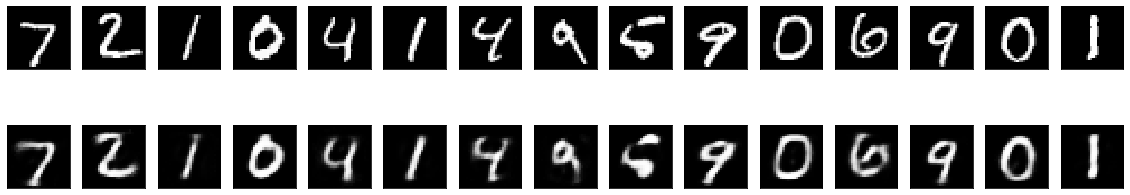

In [15]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 15
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Sparse Autoencoder

In [16]:
from keras import regularizers

In [28]:
encoding_dim = 32
input_img = Input(shape=(784, ))

encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-4))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, nb_epoch=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.6562 - val_loss: 0.6155
Epoch 2/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.5832 - val_loss: 0.5534
Epoch 3/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.5274 - val_loss: 0.5037
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.4827 - val_loss: 0.4637
Epoch 5/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.4466 - val_loss: 0.4313
Epoch 6/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.4173 - val_loss: 0.4050
Epoch 7/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.3934 - val_loss: 0.3834
Epoch 8/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.3738 - val_loss: 0.3656
Epoch 9/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.3576 - val_loss: 0.3

60000/60000 [==============================] - 2s 30us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 78/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 79/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 80/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 81/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 82/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 83/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 84/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 85/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.2628 - val_loss: 0.2625
Epoch 86/100
60000/60000 [========================

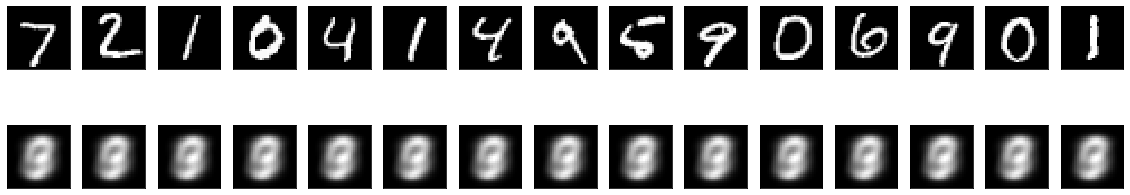

In [30]:
decoded_imgs = autoencoder.predict(x_test)

n = 15
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

出力がおかしい、改善が必要。